<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

In [46]:
idx = np.ones((200,1))
for i in range(200) :
  idx[i] = random.randrange(1,6)
idx.shape

(200, 1)

In [51]:
data2 = np.c_[data,idx]
print(data2)

[[ 15.  39.   1.]
 [ 15.  81.   1.]
 [ 16.   6.   4.]
 [ 16.  77.   4.]
 [ 17.  40.   2.]
 [ 17.  76.   4.]
 [ 18.   6.   3.]
 [ 18.  94.   4.]
 [ 19.   3.   2.]
 [ 19.  72.   3.]
 [ 19.  14.   1.]
 [ 19.  99.   3.]
 [ 20.  15.   5.]
 [ 20.  77.   2.]
 [ 20.  13.   3.]
 [ 20.  79.   3.]
 [ 21.  35.   2.]
 [ 21.  66.   2.]
 [ 23.  29.   5.]
 [ 23.  98.   4.]
 [ 24.  35.   1.]
 [ 24.  73.   1.]
 [ 25.   5.   4.]
 [ 25.  73.   5.]
 [ 28.  14.   1.]
 [ 28.  82.   1.]
 [ 28.  32.   4.]
 [ 28.  61.   4.]
 [ 29.  31.   5.]
 [ 29.  87.   1.]
 [ 30.   4.   4.]
 [ 30.  73.   1.]
 [ 33.   4.   3.]
 [ 33.  92.   5.]
 [ 33.  14.   5.]
 [ 33.  81.   2.]
 [ 34.  17.   4.]
 [ 34.  73.   2.]
 [ 37.  26.   2.]
 [ 37.  75.   1.]
 [ 38.  35.   4.]
 [ 38.  92.   3.]
 [ 39.  36.   3.]
 [ 39.  61.   1.]
 [ 39.  28.   3.]
 [ 39.  65.   1.]
 [ 40.  55.   5.]
 [ 40.  47.   2.]
 [ 40.  42.   2.]
 [ 40.  42.   2.]
 [ 42.  52.   2.]
 [ 42.  60.   2.]
 [ 43.  54.   4.]
 [ 43.  60.   4.]
 [ 43.  45.   2.]
 [ 43.  41

In [3]:
def compute_distance(a,b) :
  dist = np.sqrt((a[0] - b[0])**2 + (a[1]-b[1])**2)
  return dist

In [ ]:
def compute_centroid(Z):

    center = np.ones((1,2))
    center[0,0] = (np.sum(Z[:,0])) / len(Z[:,0])
    center[0,1] = (np.sum(Z[:,1])) / len(Z[:,1])
    return center

#OUTPUT

1.Plot the data points [1pt]

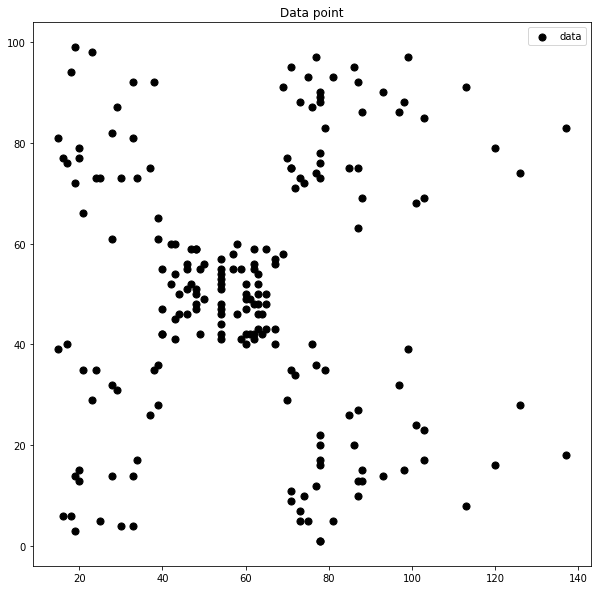

In [60]:
plt.figure(1,figsize=(10,10))
plt.scatter(data[:,0], data[:,1], s=50, c='black', label ='data')
plt.title('Data point')
plt.legend(loc='best')
plt.show()